In [1]:
import os
import torch
import pymongo
import numpy as np

from matplotlib import pyplot as plt
from torch.distributions import Normal

from deep_fields import data_path, models_path
from deep_fields.data.crypto.create_dataset_files import create_merged_dataframe
from deep_fields import data_path
from deep_fields.data.crypto.dataloaders import CryptoDataLoader

crypto_plots_dir = os.path.join(models_path,"crypto_plots")
if not os.path.isdir(crypto_plots_dir):
    os.makedirs(crypto_plots_dir)
    
%matplotlib inline

In [2]:
top = 589 

client = pymongo.MongoClient()
db = client["crypto"]
collection = db['birth_2021-06-14']

In [3]:
crypto_folder = os.path.join(data_path, "raw", "crypto")
#data_folder = os.path.join(crypto_folder, "2021-06-02")
data_folder = os.path.join(crypto_folder, "2021-06-14")

kwargs = {"path_to_data":data_folder,
          "batch_size": 29,
          "steps_ahead":10,
          "span":"full"}

data_loader = CryptoDataLoader('cpu', **kwargs)
data_loader.set_portfolio_assets("2021-06-14","full",predictor=None,top=top)
data_batch = next(data_loader.train.__iter__())

#print(data_batch.pmv.shape)
#print(data_batch.lifetime)
print(data_loader.portfolio_pmv.shape)
print(data_loader.portfolio_survival)
print(data_loader.portfolio_birth)

Current Coin 1 ethereum
Current Coin 2 tether
Current Coin 3 binancecoin
Current Coin 4 cardano
Current Coin 5 dogecoin
Current Coin 6 ripple
Current Coin 7 usd-coin
Current Coin 8 polkadot
Current Coin 9 uniswap
Current Coin 10 bitcoin-cash
Current Coin 11 litecoin
Current Coin 12 solana
Current Coin 13 chainlink
Current Coin 14 binance-usd
Current Coin 15 matic-network
Current Coin 16 theta-token
Current Coin 17 internet-computer
Current Coin 18 stellar
Current Coin 19 ethereum-classic
Current Coin 20 vechain
Current Coin 21 wrapped-bitcoin
Current Coin 22 filecoin
Current Coin 23 tron
Current Coin 24 dai
Current Coin 25 eos
Current Coin 26 monero
Current Coin 27 aave
Current Coin 28 kusama
Current Coin 29 cdai
Current Coin 30 okb
Current Coin 31 neo
Current Coin 32 shiba-inu
Current Coin 33 bitcoin-cash-sv
Current Coin 34 algorand
Current Coin 35 compound-usd-coin
Current Coin 36 pancakeswap-token
Current Coin 37 crypto-com-chain
Current Coin 38 iota
Current Coin 39 theta-fuel
Curre

Current Coin 312 auction
Current Coin 313 tokenlon
Current Coin 314 hathor
Current Coin 315 alchemist
Current Coin 316 superfarm
Current Coin 317 vai
Current Coin 318 handshake
Current Coin 319 power-ledger
Current Coin 320 aion
Current Coin 321 iris-network
Current Coin 322 kyber-network-crystal
Current Coin 323 just
Current Coin 324 noia-network
Current Coin 325 adex
Current Coin 326 rally-2
Current Coin 327 bytecoin
Current Coin 328 chromaway
Current Coin 329 zcoin
Current Coin 330 energi
Current Coin 331 parsiq
Current Coin 332 tellor
Current Coin 333 reddcoin
Current Coin 334 quick
Current Coin 335 mainframe
Current Coin 336 linear
Current Coin 337 compound-basic-attention-token
Current Coin 338 lukso-token
Current Coin 339 kin
Current Coin 340 super-zero
Current Coin 341 waultswap-polygon
Current Coin 342 insure
Current Coin 343 alpaca-finance
Current Coin 344 gala
Current Coin 345 crust-network
Current Coin 346 convex-crv
Current Coin 347 smooth-love-potion
Current Coin 348 hoge

In [55]:
data_loader.portfolio_birth

[datetime.datetime(2015, 1, 1, 0, 0),
 datetime.datetime(2015, 8, 7, 0, 0),
 datetime.datetime(2015, 2, 25, 0, 0),
 datetime.datetime(2017, 9, 16, 0, 0),
 datetime.datetime(2017, 10, 18, 0, 0),
 datetime.datetime(2015, 1, 1, 0, 0),
 datetime.datetime(2015, 1, 1, 0, 0),
 datetime.datetime(2018, 10, 5, 0, 0),
 datetime.datetime(2020, 8, 19, 0, 0),
 datetime.datetime(2020, 9, 17, 0, 0),
 datetime.datetime(2017, 8, 2, 0, 0),
 datetime.datetime(2015, 1, 1, 0, 0),
 datetime.datetime(2020, 4, 11, 0, 0),
 datetime.datetime(2017, 11, 9, 0, 0),
 datetime.datetime(2019, 9, 21, 0, 0),
 datetime.datetime(2019, 4, 27, 0, 0),
 datetime.datetime(2018, 1, 24, 0, 0),
 datetime.datetime(2021, 5, 10, 0, 0),
 datetime.datetime(2015, 1, 1, 0, 0),
 datetime.datetime(2016, 7, 24, 0, 0),
 datetime.datetime(2018, 7, 27, 0, 0),
 datetime.datetime(2019, 2, 1, 0, 0),
 datetime.datetime(2020, 10, 15, 0, 0),
 datetime.datetime(2017, 11, 9, 0, 0),
 datetime.datetime(2019, 11, 19, 0, 0),
 datetime.datetime(2017, 7, 9,

In [4]:
#data_loader.portfolio_ids

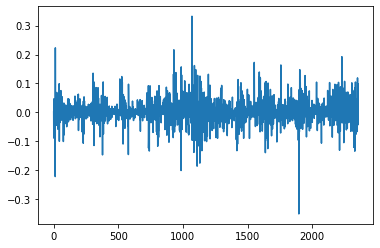

In [6]:
plt.plot(data_loader.portfolio_returns[0,:].detach().numpy())

In [7]:
returns_ = data_loader.portfolio_returns[torch.where(data_loader.portfolio_returns == data_loader.portfolio_returns)].detach().numpy()

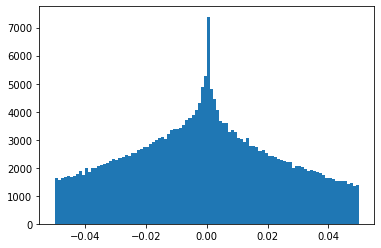

In [8]:
stuff = plt.hist(returns_,bins=100,range=[-0.05,0.05])

# Maximum Likelihood Estimation

In [43]:
number_of_assets = data_loader.portfolio_pmv.shape[0]
number_of_steps =  data_loader.portfolio_pmv.shape[1]
one_price = data_loader.portfolio_pmv[-2][:,0]
one_price_survival = data_loader.portfolio_survival[-2]

negative_survival_index = list(map(lambda a :a*(-1),data_loader.portfolio_survival))
birth_index = data_loader.portfolio_pmv[:,:,0].shape[1] + torch.Tensor(negative_survival_index).long()
portfolio_survival = torch.Tensor(data_loader.portfolio_survival)
prices = data_loader.portfolio_pmv[:,:,0]
X = torch.log(prices)
initial_prices = torch.index_select(prices,1,birth_index)
initial_prices = torch.diagonal(initial_prices)

log_initial_prices = torch.index_select(X,1,birth_index)
log_initial_prices = torch.diagonal(log_initial_prices)
log_final_prices = X[:,-2]

#survival_mask = torch.arange(0,number_of_steps-1).long()
#survival_mask = survival_mask[None,:].repeat(10,1)
#survival_mask = survival_mask >= birth_index[:,None]
#survival_mask = survival_mask.float()

In [44]:
# data_loader.portfolio_ids

In [45]:
dX = log_final_prices - log_initial_prices
DX = X[:,1:] - X[:,:-1]
DX = DX**2.
DX[DX != DX] = 0.
DX[DX == np.inf] = 0.
DX[DX == -np.inf] = 0.

sigma_square_ml = DX.sum(axis=1)/portfolio_survival - (dX**2)/portfolio_survival**2
mu_ml = DX.sum(axis=1)/portfolio_survival + 0.5*sigma_square_ml
sigma_ml = torch.sqrt(sigma_square_ml)

<ipython-input-48-8eec5f1e408a>:1: RuntimeWarning: divide by zero encountered in log
  log_initial_prices = np.log(initial_prices.detach().numpy())


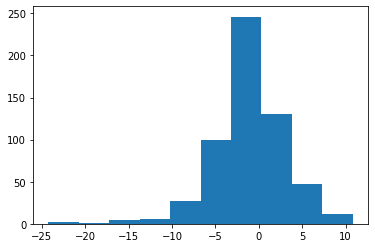

In [48]:
log_initial_prices = np.log(initial_prices.detach().numpy())
log_initial_prices[log_initial_prices == -np.inf] = None
stuff = plt.hist(log_initial_prices)

# Sample Geometric Brownian Motion

\begin{equation}
S_t = S_0 \exp\left\{(\mu-\frac{\sigma^2}{2})t + \sigma W_t\right\}    
\end{equation}

In [49]:
dW = Normal(0,1.).sample(sample_shape=(top,number_of_steps))
W = dW.cumsum(axis=1)
t = torch.arange(0,number_of_steps)[None,:].repeat(top,1)
S = initial_prices[:,None]*torch.exp((mu_ml - sigma_square_ml*.5)[:,None]*t + sigma_ml[:,None]*W)

In [50]:
simulated_returns = (S[:, 1:] - S[:, :-1]) / (S[:, :-1])

In [51]:
simulated_returns

tensor([[ 0.0044,  0.0100, -0.0334,  ..., -0.0435,  0.0265,  0.0734],
        [    nan,     nan,     nan,  ...,     nan,     nan,     nan],
        [ 0.0158,  0.0117,  0.0031,  ...,  0.0021,  0.0142, -0.0020],
        ...,
        [ 0.0748,  0.1559,  0.1057,  ...,     nan,     nan,     nan],
        [-0.1247, -0.0033,  0.0744,  ..., -0.1760,  0.0050,  0.1136],
        [-0.1180,  0.0860, -0.0997,  ...,  0.0631,  0.0323, -0.1260]])

In [52]:
data_loader.portfolio_returns.shape

torch.Size([589, 2357])

Text(0.5, 1.0, 'Log Returns')

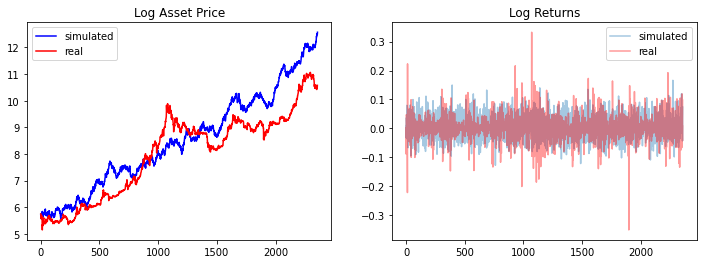

In [53]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
ax[0].plot(torch.log(S[0,:]).detach().numpy(),"b-",label="simulated")
ax[0].plot(torch.log(data_loader.portfolio_pmv[0,:,0]).detach().numpy(),"r-",label="real")
ax[0].legend(loc="best")
ax[0].set_title("Log Asset Price")
ax[1].plot(simulated_returns[0,:].detach().numpy(),alpha=0.4,label="simulated")
ax[1].plot(data_loader.portfolio_returns[0,:].detach().numpy(),alpha=0.4,color="red",label="real")
ax[1].legend(loc="best")
ax[1].set_title("Log Returns")

In [54]:
coin_index = 0
one_returns = data_loader.portfolio_returns[coin_index,:]
one_prices = data_loader.portfolio_pmv[coin_index,:,0]
number_of_steps = one_prices.shape[0]

In [45]:
one_initial_price = one_prices[0]
one_price_from_return = torch.zeros((number_of_steps))
one_price_from_return[0] = one_initial_price
for i in range(number_of_steps-1):
    one_price_from_return[i+1]= one_returns[i]*one_price_from_return[i] + one_price_from_return[i]

# Prices From Returns

In [ ]:
# prices from returns (requieres initial price)

S0 = 100.
S0 = torch.full((1,mjpc_s.number_of_processes),S0)
S = torch.exp(log_returns)
S = torch.vstack((S0,S))

for i in range(mjpc_s.number_of_realizations):
    S[i+1,:] = S[i+1,:]*S[i,:]

In [ ]:
diffusive_ = False 
process_to_plot = 0

if diffusive_:
    log_returns = data_loader["diffusive_log_returns"]
else:
    log_returns = data_loader["log_returns"]

fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(12,3))
pd.Series(log_returns[:,process_to_plot].numpy()).plot(ax=ax[0])
pd.Series(torch.exp(log_returns[:,process_to_plot]).numpy()).plot(ax=ax[1])